In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food_claims = pd.read_csv('food_claims_2212.csv')

# Original Data Frame

In [3]:
food_claims.head(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [4]:
food_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


# 1. For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

In [5]:
df = food_claims

## claim_id

In [6]:
df.claim_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: claim_id
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [7]:
df.claim_id = df.claim_id.astype('category')

assert df.claim_id.dtype == 'category'

In [8]:
df.claim_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: claim_id
Non-Null Count  Dtype   
--------------  -----   
2000 non-null   category
dtypes: category(1)
memory usage: 84.2 KB


The claim_id values were the unique identifier of the claim however, it wasn't nominal so I changed the data type to _category_ to match the decription. It's impossible for it to have missing values due to the database structure.

## time_to_close

In [9]:
df.time_to_close.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: time_to_close
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


The time_to_close values matched the description given and the column didn't have any missing values.

## claim_amount

In [10]:
df.claim_amount.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: claim_amount
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [11]:
df.claim_amount.head(3)

0    R$ 74474.55
1    R$ 52137.83
2     R$ 24447.2
Name: claim_amount, dtype: object

In [12]:
df.claim_amount = df.claim_amount.str.strip('R$ ')
df.claim_amount = df.claim_amount.astype('float')

assert df.claim_amount.dtype == 'float'

In [13]:
df.claim_amount = round(df.claim_amount, 2)

In [14]:
df.claim_amount.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: claim_amount
Non-Null Count  Dtype  
--------------  -----  
2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


The claim_amount values didn't match the data type desribed so I removed the text and changed the column to _float_ data type. Also, I rounded the values to two decimal places to match the description. The column didn't have any missing values.

## amount_paid

In [15]:
df.amount_paid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: amount_paid
Non-Null Count  Dtype  
--------------  -----  
1964 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [16]:
df.amount_paid = round(df.amount_paid, 2)

In [17]:
df.amount_paid.isnull().sum()

36

In [18]:
round(df.amount_paid.median(), 2)

20105.7

In [19]:
df.amount_paid = df.amount_paid.fillna(round(df.amount_paid.median(), 2))

In [20]:
df.amount_paid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: amount_paid
Non-Null Count  Dtype  
--------------  -----  
2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


The amount_paid values had the correct data type; however, I rounded the values to two decimal places to match the description. Also, the column had 36 missing values that I replaced with the overall median amount paid, as described.

## location

In [21]:
df.location.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [22]:
df.location = df.location.astype('category')

assert df.location.dtype == 'category'

In [23]:
df.location.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: location
Non-Null Count  Dtype   
--------------  -----   
2000 non-null   category
dtypes: category(1)
memory usage: 2.3 KB


The location values didn't have the correct data type so I changed it to _category_ to match the description. The column didn't have any missing values.

## individuals_on_claim

In [24]:
df.individuals_on_claim.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: individuals_on_claim
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


The individuals_on_claim values matched the description and the column didn't have any missing values.

## linked_cases

In [25]:
df.linked_cases.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: linked_cases
Non-Null Count  Dtype 
--------------  ----- 
1974 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [26]:
df.linked_cases = df.linked_cases.astype('category')

assert df.linked_cases.dtype == 'category'

In [27]:
df.linked_cases.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: linked_cases
Non-Null Count  Dtype   
--------------  -----   
1974 non-null   category
dtypes: category(1)
memory usage: 2.2 KB


In [28]:
df.linked_cases.isnull().sum()

26

In [29]:
df.linked_cases = df.linked_cases.fillna(0)

In [30]:
df.linked_cases.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: linked_cases
Non-Null Count  Dtype   
--------------  -----   
2000 non-null   category
dtypes: category(1)
memory usage: 2.2 KB


The linked_cases values didn't match the description so I changed the data type to _category_ to match. Also, the column had 26 missing values that I replaced with False, as described.

## cause

In [31]:
df.cause.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: cause
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [32]:
df.cause = df.cause.astype('category')

assert df.cause.dtype == 'category'

In [33]:
df.cause.dtypes

CategoricalDtype(categories=[' Meat', 'VEGETABLES', 'meat', 'unknown', 'vegetable'], ordered=False)

In [34]:
df.cause = df.cause.str.lower()

In [35]:
df.cause = df.cause.str.strip()
df.cause = df.cause.str.strip('s')

In [36]:
df.cause = df.cause.astype('category')

assert df.cause.dtype == 'category'

In [37]:
df.cause.dtypes

CategoricalDtype(categories=['meat', 'unknown', 'vegetable'], ordered=False)

The cause values didn't match the description so I changed the data type to _category_ to match. The categories were also inconsistent so I cleaned them up making the column all lowercase, removing spaces, and removing the letter 's'. The column didn't have any missing values.

# Cleaned Dataframe

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   claim_id              2000 non-null   category
 1   time_to_close         2000 non-null   int64   
 2   claim_amount          2000 non-null   float64 
 3   amount_paid           2000 non-null   float64 
 4   location              2000 non-null   category
 5   individuals_on_claim  2000 non-null   int64   
 6   linked_cases          2000 non-null   category
 7   cause                 2000 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 153.0 KB


# 2. Create a visualization that shows the number of claims in each location. Use the visualization to:

   - State which category of the variable location has the most observations
   - Explain whether the observations are balanced across categories of the variable location

<AxesSubplot:>

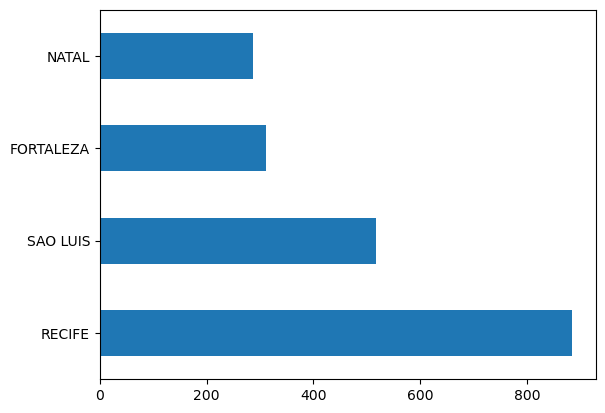

In [39]:
df.location.value_counts().plot(kind='barh')

Looking at the bar graph above we can clearly see the Recife location has the most number of observations. In addition, we clearly see the number of observations are not balanced across the four locations. Natal and Fortaleza appear to have a balanced number of observations but well below the number of Sao Luis and Recife.

# 3. Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

<AxesSubplot:ylabel='Frequency'>

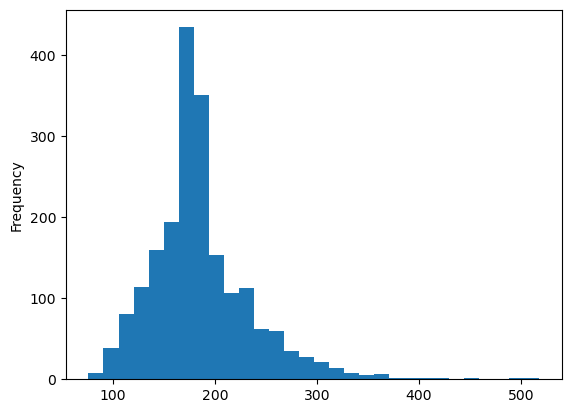

In [40]:
df.time_to_close.plot(kind='hist',bins=30)

Looking at the distribution graph above of the overall time to close claims we can see that it has a positive skew. It appears to have a wide range with a minimum below a 100 and a maximum above 500 but with a positive skew we can make a few statistical assumptions. First, a majority of the claims closed  between 150 and 200 days which is why it is skewed. Second, we can assume the overall median of days to close is lower then the mean. Third, the mode is lower then the median.

# 4. Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

Text(0.5, 9.444444444444438, 'Time To Close(Days)')

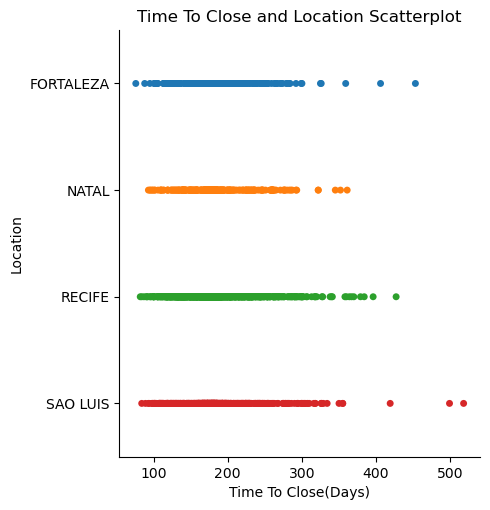

In [41]:
sns.catplot(x ='time_to_close', y ='location', data=df, jitter=False)
plt.title('Time To Close and Location Scatterplot')
plt.ylabel('Location')
plt.xlabel('Time To Close(Days)')

Text(0.5, 9.444444444444438, 'Time To Close(Days)')

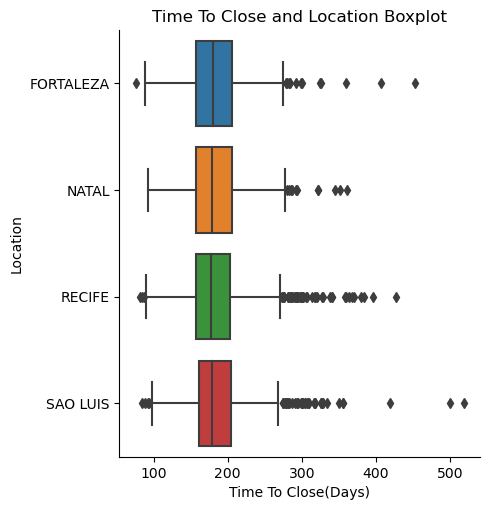

In [42]:
sns.catplot(x ='time_to_close', y ='location', data=df, kind="box")
plt.title('Time To Close and Location Boxplot')
plt.ylabel('Location')
plt.xlabel('Time To Close(Days)')

Looking at the two graphs above we can make a few assumptions about the relaitonship between time to close and location. The scatterplot plots all the claims per location and surprisingly they all look quite similar. So I decided to plot a boxplot as well to double check and get a better visualization. The benefit of the boxplot is that it gives you the first quartile, median, and third quartile of the time to close per location. Looking at both graphs we can assume there is no relationship between the time to close and location. The time to close was consistent, with similar interquatile ranges, across the four locations.